In [61]:
#import necessary libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [5]:
student = pd.read_csv("http://bit.ly/w-data") # import dataset

In [6]:
student.head(5) # vizualize of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
student.columns # checking column here 

Index(['Hours', 'Scores'], dtype='object')

In [8]:
student.shape # checking shape

(25, 2)

In [9]:
# EDA

In [10]:
student.describe() # descr5be about data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
student.dtypes # check the types of data

Hours     float64
Scores      int64
dtype: object

In [12]:
student.info() # giving  the information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
student.isnull().sum() # checking for null values present or not

Hours     0
Scores    0
dtype: int64

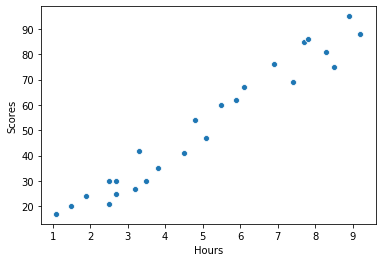

In [14]:
sns.scatterplot(x = "Hours",y = "Scores",data = student) # vizualization of relationship between two variable

In [15]:
student.corr() # check the correlation value means strength between two variable

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [16]:
# check for outliers

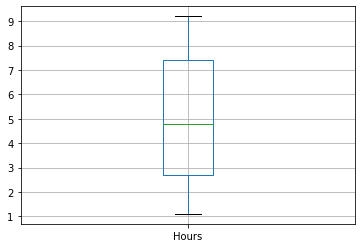

In [17]:
student.boxplot(column='Hours')

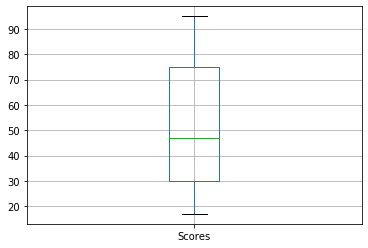

In [18]:
student.boxplot(column='Scores')

In [19]:
student.iloc[:,1:2]= student.iloc[:,1:2].astype(float) # converting all intiger into float

In [20]:
student.head()

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


In [21]:
# model building

In [22]:
x = student['Hours'] # putting independent variable in x
y =student['Scores'] # putting dependent variable in y

In [23]:
import statsmodels.api as sm # import necessary libreries for model building

In [24]:
from sklearn.metrics import mean_squared_error #  import libreries for error checking of model

In [25]:
import math

In [26]:
import scipy.stats as stats

In [27]:
model = sm.OLS(y, x).fit()

In [28]:
predicted_value = model.predict(x) # model use for prediction

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Scores   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              2579.
Date:                Tue, 21 Jul 2020   Prob (F-statistic):                    6.10e-26
Time:                        20:09:08   Log-Likelihood:                         -78.026
No. Observations:                  25   AIC:                                      158.1
Df Residuals:                      24   BIC:                                      159.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hours         10.1743      0.200     50.787      0.000       9.761      10.588
==============================================================================
Omnibus:                        4.755   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                2.042
Skew:                          -0.363   Prob(JB):                        0.360
Kurtosis:                       1.803   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# predicted value
print(predicted_value)  # predicted values

0     25.435643
1     51.888711
2     32.557623
3     86.481185
4     35.609900
5     15.261386
6     93.603165
7     55.958414
8     84.446334
9     27.470494
10    78.341779
11    60.028117
12    45.784157
13    33.575048
14    11.191683
15    90.550888
16    25.435643
17    19.331088
18    62.062968
19    75.289502
20    27.470494
21    48.836434
22    38.662177
23    70.202374
24    79.359205
dtype: float64


In [31]:
error =  y - predicted_value # error check

In [32]:
print(error)

0     -4.435643
1     -4.888711
2     -5.557623
3    -11.481185
4     -5.609900
5      4.738614
6     -5.603165
7      4.041586
8     -3.446334
9     -2.470494
10     6.658221
11     1.971883
12    -4.784157
13     8.424952
14     5.808317
15     4.449112
16     4.564357
17     4.668912
18     4.937032
19    -6.289502
20     2.529506
21     5.163566
22    -3.662177
23     5.797626
24     6.640795
dtype: float64


In [33]:
Terror=np.sum(y)-np.sum(predicted_value) # total error prediction

In [34]:
print(Terror)

12.165589029870262


In [35]:
mes = mean_squared_error(y,predicted_value) 

In [36]:
rmse = math.sqrt(mes) # root mean square value

In [37]:
print(rmse)

5.485557811801189


Text(0.5, 1.0, 'Residual plot')

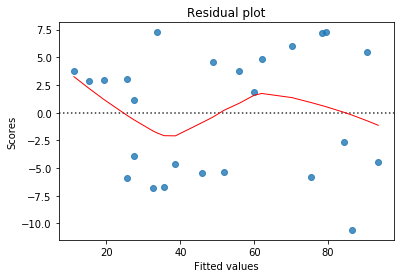

In [38]:
sns.residplot(predicted_value,'Scores', data=student,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1}) # error distribution of model
plt.xlabel("Fitted values")
plt.title('Residual plot')

Text(0.5, 1.0, 'Normal Q-Q Plot')

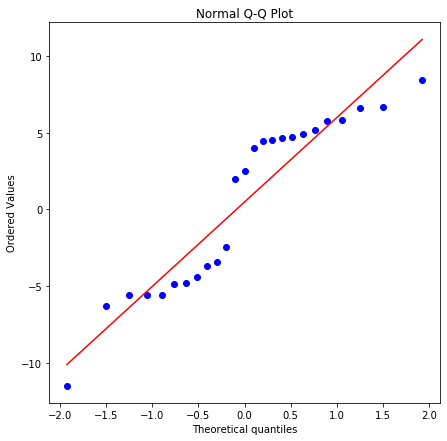

In [39]:
residuals = student["Scores"] - predicted_value
residuals
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)   # check for normalizatio
plt.title("Normal Q-Q Plot")

Text(0.5, 0, 'Fitted value')

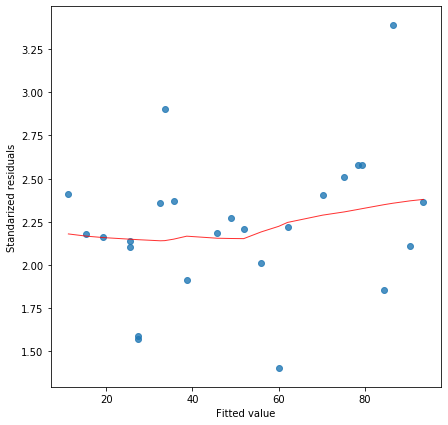

In [40]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(predicted_value, model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

In [49]:
#
X = student[['Hours']]
y = student['Scores'].values.reshape(-1,1)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)    # spliting data into train and test

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape # check for shape

((20, 1), (5, 1), (20, 1), (5, 1))

In [46]:
from sklearn.linear_model import LinearRegression # regression model

# then  again i try different model

In [52]:
reg = LinearRegression().fit(X_train, y_train)   # then passed our features

In [54]:
reg.score(X_train,y_train) # model accuracy based on train

0.9491209376364417

In [55]:
reg.predict(X_test)  # predicted values
# NOw we predict score based on hour

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [60]:
val = 9.75 # predict for 9.75 hr

reg.predict([[val]])[0][0]


#It also possible to done with different values

97.22715435984279